# Starfield Generator

The following code will generate a starfield in either png format or svg format. I like drawing in vector tools like sketchapp or adobe illustrator, but for me make a starfield was a very long process. Where do I put the stars, how big should they be, how many should I add. It tool a long time. 

So this tool will let you set size and width of your output image. Then you can choose the number of stars and their maximum radius. You can also choose the color of the background and the stars. The default is black background and white stars. 

## Next Steps
* Color the stars slightly. Like a very little red, blue yellow
* I don't really like the method to create random widths. It is hard to change the values. I am imagining maybe something like the definition of a curve would be cleaner and easier to change out to get different results. 

In [348]:
# just some imports, PIL is responsible for drawing images like pngsk svgwrite will generate SVG code

from IPython.display import Image as DisplayImage
from IPython.display import SVG as DisplaySVG

from PIL import Image, ImageDraw
import svgwrite
import random
import math

# code completion helper
%config IPCompleter.greedy=True

In [349]:
# Class to hold the data for each star
class Star:
    def __init__(self, x, y, radius):
        self.x = x
        self.y = y
        self.radius = radius
        self.diameter = radius * 2

# Starfield Class 
class Starfield:
    # initialize the class with default values
    def __init__(self, 
                 width=3840, height=2160, padding=10, 
                 max_radius=8, number_of_stars=1200, 
                 star_color='white', background_color='black',
                 filename='starfield'):
        
        self.width = width
        self.height = height
        self.padding = padding
        self.max_radius = max_radius
        self.number_of_stars = number_of_stars
        self.star_color = star_color
        self.background_color = background_color
        self.filename = filename
      
    # This method creates a random radius for each star, but prefers to make
    # many more smaller stars and less big stars to better reflect a natural
    # our night sky
    # Can all this could be converted to something smaller like a curve?
    # the ceil part is trying to make sure I don't create 0 sized stars
    @staticmethod
    def get_random_radius(interval, max_radius):
        if interval <= 0.5:
            min = 1
            max = math.ceil(max_radius * 0.2)
        elif interval > 0.5 and interval <= 0.8:
            min = math.ceil(max_radius * 0.2)
            max = math.ceil(max_radius * 0.4)
        elif interval > 0.8 and interval <= 0.95:
            min = math.ceil(max_radius * 0.4)
            max = math.ceil(max_radius * 0.9)
        else:
            min = math.ceil(max_radius * 0.9)
            max = math.ceil(max_radius * 1.2)

        return random.randint(min, max)
    
    # create all the stars details
    def get_star_list(self):
        star_list = []
        
        # padding just makes sure a star is not drawn right on the edge of the
        # image. It looks a little weird when it does that.
        for star in range(1, self.number_of_stars):
            x = random.randint(0+self.padding, self.width-self.padding)
            y = random.randint(0+self.padding, self.height-self.padding)
            
            # what star am I on from 0 to 1
            interval = star/self.number_of_stars
            random_radius = self.get_random_radius(interval, self.max_radius)
            
            # create a star
            s = Star(x, y, random_radius)
            star_list.append(s)
        
        return star_list
        
    def create_field_png(self):
        # starfield image
        
        # background layer
        background = Image.new('RGBA', (self.width, self.height), color = self.background_color)
        
        # transparent layer to hold the stars
        stars = Image.new('RGBA', background.size, (255,255,255,0)) # transparent 

        # star object
        star = ImageDraw.Draw(stars)
        
        # add the stars baby
        for s in self.get_star_list():
            star.ellipse((s.x, s.y, s.x+s.diameter, s.y+s.diameter), fill=self.star_color)

        # add stars on top of background
        composite = Image.alpha_composite(background, stars)

        # save the file
        composite.save(f"{self.filename}.png")
        
    def create_field_svg(self):
        svg = svgwrite.Drawing(f"{self.filename}.svg", profile='tiny')

        # background layer
        background_rect = svg.rect((0, 0), (self.width, self.height), fill=self.background_color, id='background')
        svg.add(background_rect)
        
        # stars group (layer)
        stars_group = svgwrite.container.Group(id='stars')

        # add the stars baby
        for s in self.get_star_list():
            star = svg.circle(center=(s.x, s.y), r=s.radius, fill=self.star_color, id='star')
            stars_group.add(star)

        svg.add(stars_group)    
        svg.save()

In [350]:
# Create the starfield instance
sf = Starfield()

# provide settings to customize your image. You do not need to provide any 
# setting to produce the first image. There are defaults for all values. 

#sf.star_color = 'blue'
#sf.background_color = 'green'

sf.width = 2880*2
sf.height = 1800*2
sf.max_radius = 10
sf.number_of_stars = 1100

sf.create_field_svg()
sf.create_field_png()

In [351]:
# Why does this not show the entire image scaled down?
DisplaySVG(filename='starfield.svg')

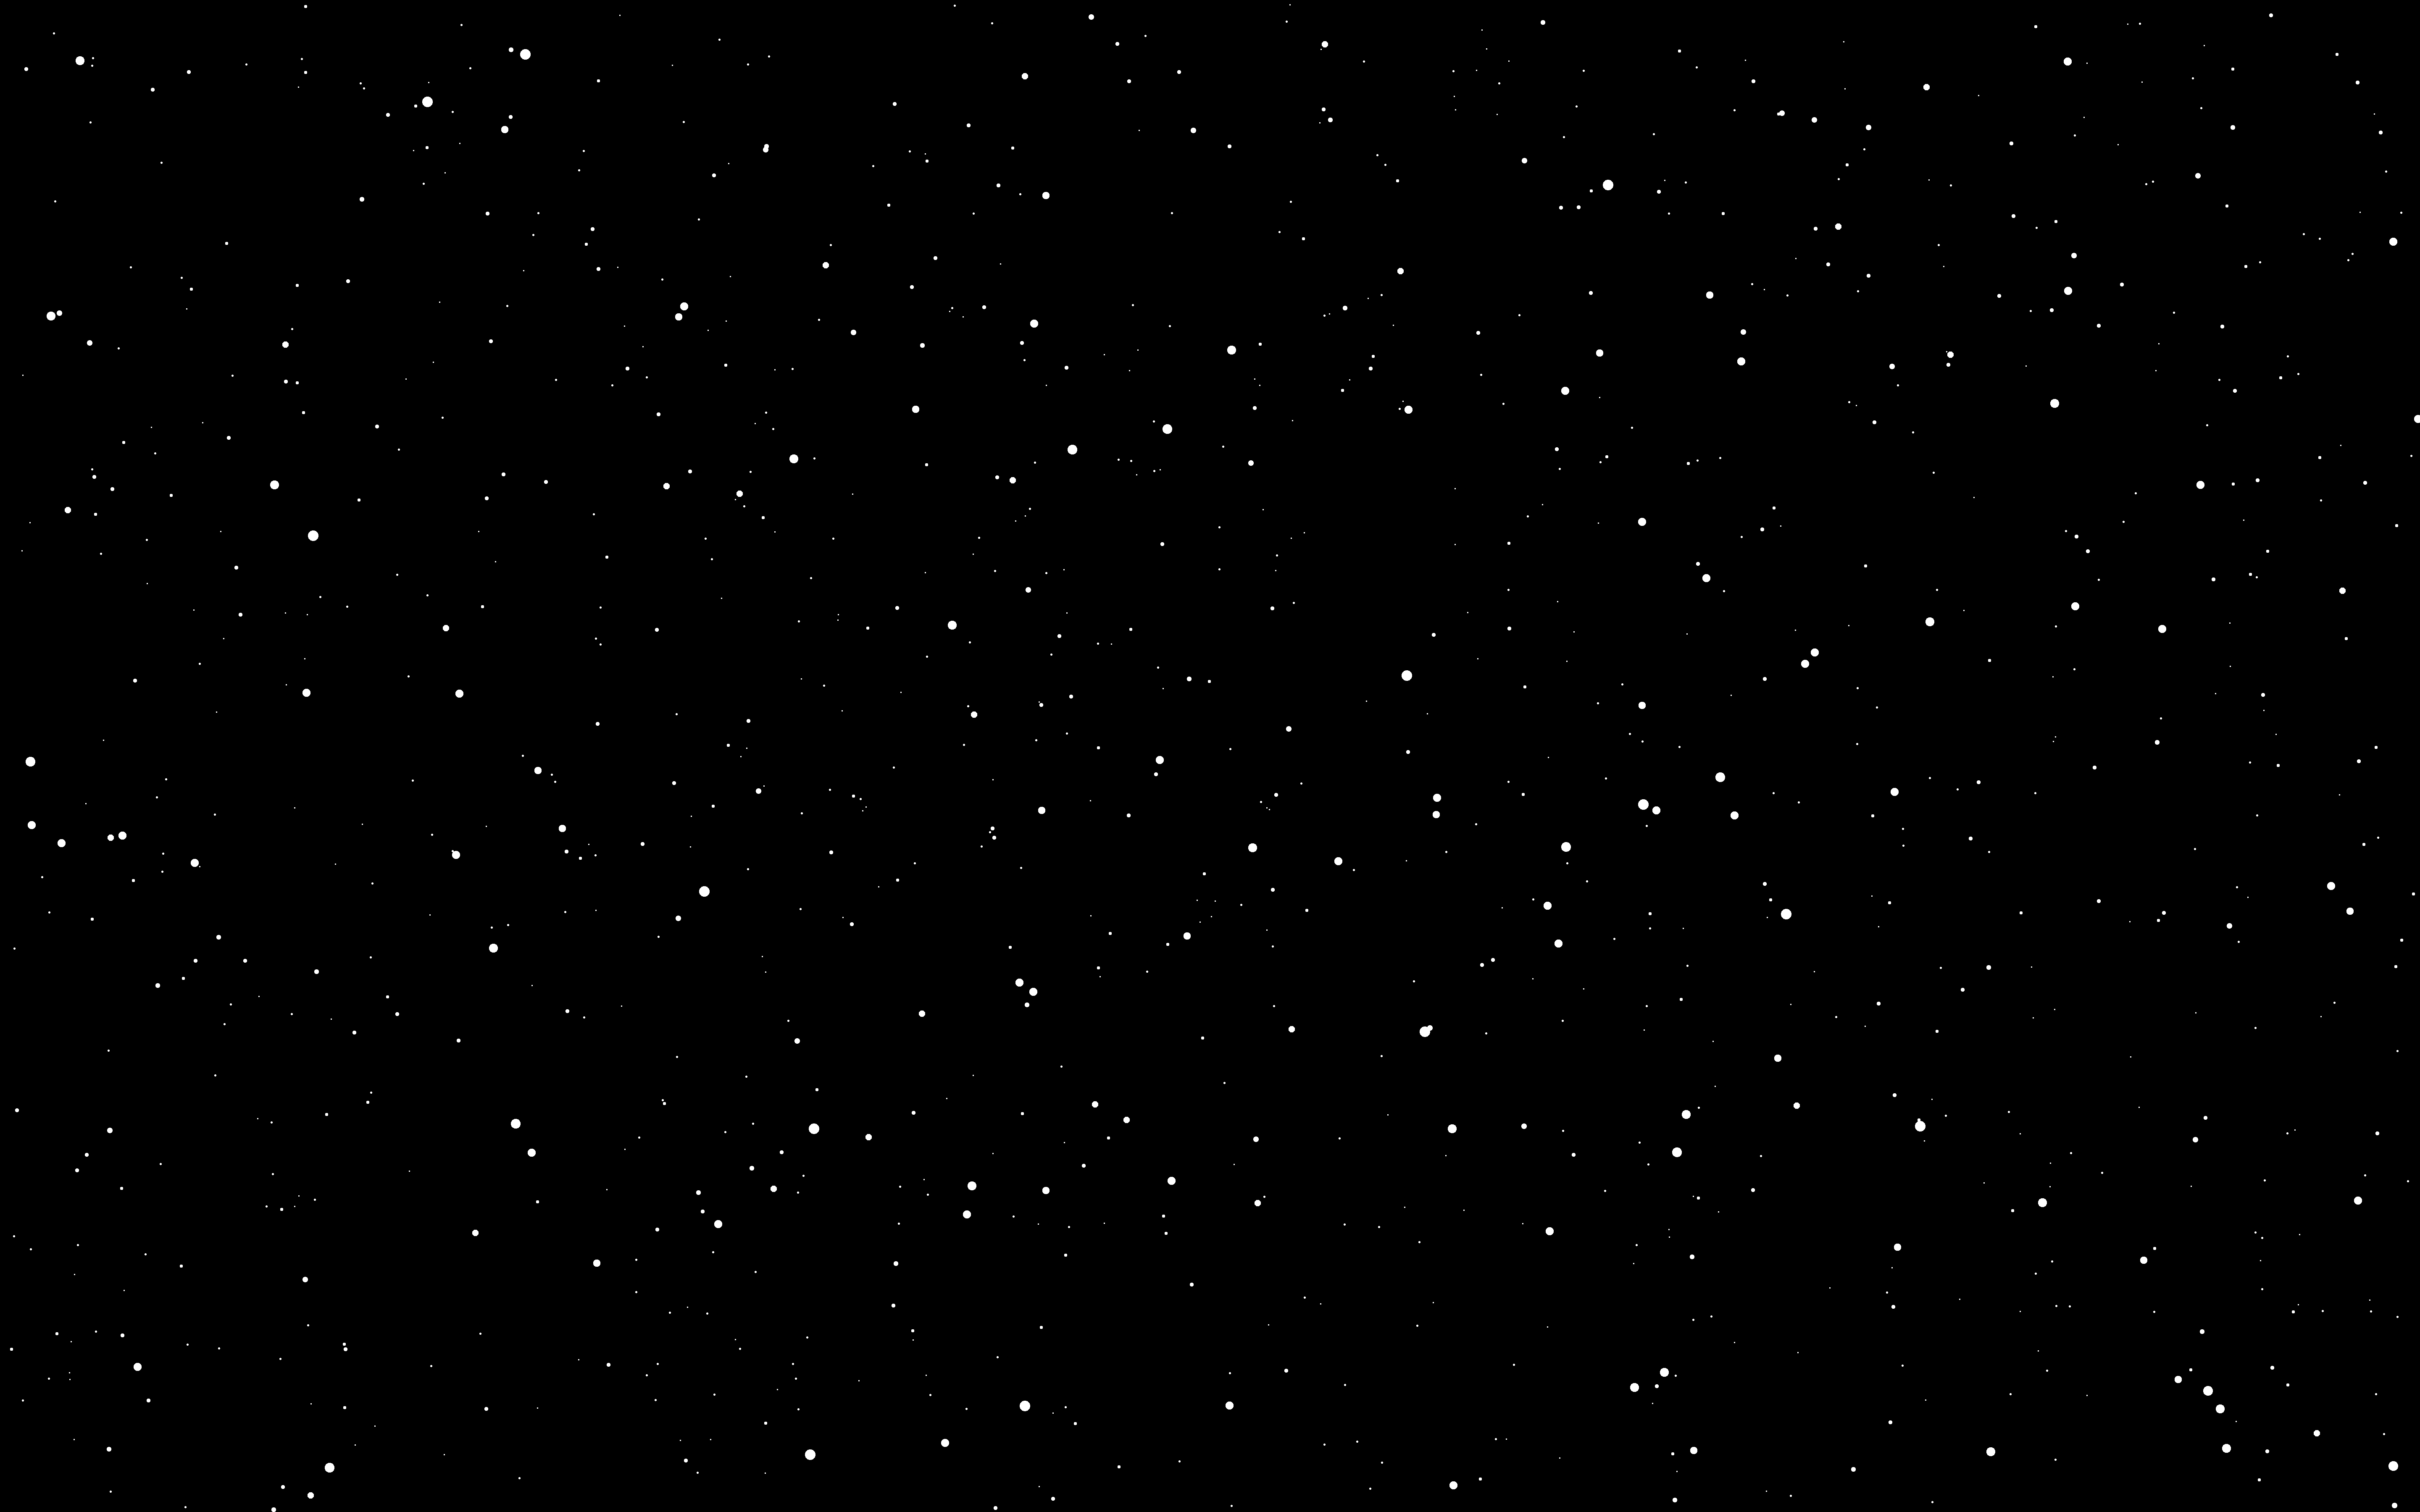

In [352]:
DisplayImage(filename='starfield.png') 

In [353]:
# It works on very small images also
# Create the starfield instance
sf_small = Starfield()

# provide settings to customize your image. You do not need to provide any 
# setting to produce the first image. There are defaults for all values. 

#sf.star_color = 'blue'
#sf.background_color = 'green'

sf.width = 100
sf.height = 100
sf.max_radius = 4
sf.number_of_stars = 30
sf.padding = 2
sf.filename = 'starfield_small'

sf.create_field_svg()
sf.create_field_png()

In [354]:
# Why does this not show the entire image scaled down?
DisplaySVG(filename='starfield_small.svg')

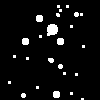

In [355]:
DisplayImage(filename='starfield_small.png') 